## Checking resolution

In [61]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import cartopy

import os
home = os.path.expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [100]:
plt.rcParams['figure.figsize'] = [17.5, 5]

In [28]:
from myFuncs import *

### CMIP6

In [29]:
variable = 'precip'

models_cmip6 =[
    # 'TaiESM1',        # 1 # rcp monthly
    # 'BCC-CSM2-MR',    # 2 # rcp monthly   
    # 'FGOALS-g3',      # 3 # rcp 0463 - 0614
    # 'CNRM-CM6-1',     # 4 # rcp 1850-1999
    # 'MIROC6',         # 5 # rcp 3200 - 3340
    'MPI-ESM1-2-HR',  # 6 # rcp 1850 - 2014
    # 'NorESM2-MM',     # 7 # rcp 0001 - 0141
    # 'GFDL-CM4',       # 8 # rcp 0001 - 0141 (gr2)
    # 'CanESM5',        # 9 # rcp 1850 - 2000
    # 'CMCC-ESM2',      # 10 # rcp monthly
    # 'UKESM1-0-LL',    # 11 # rcp 1850 - 1999
    # 'MRI-ESM2-0',     # 12 # rcp 1850 - 2000
    # 'CESM2',          # 13 # rcp 0001 - 0990  (multiple fill values (check if all get converted to NaN), for historical)
    # 'NESM3',          # 12 # rcp 1850-2014
    ]

resolutions = [
    'original',
    # 'regridded'
    ]

experiments =[
    'historical',
    # 'rcp85'
    ]

In [32]:
ds = get_dsvariable('precip', models_cmip6[0], experiments[0], resolution=resolutions[0])
ds

<xarray.Dataset>
Dimensions:  (time: 10950, lat: 74, lon: 288)
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
  * lat      (lat) float64 -34.4 -33.46 -32.51 -31.57 ... 31.57 32.51 33.46 34.4
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes: (12/50)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 0671-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     171550.0
    ...                        ...
    title:                     TaiESM1 output prepared for CMIP6
    variable_id:               pr
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/f30753ce-cdb4-4fb8-a265-1bdb1f2f3c6b

In [39]:
data = ds['precip']
data

<xarray.DataArray 'precip' (time: 10950, lat: 74, lon: 288)>
[233366400 values with dtype=float32]
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
  * lat      (lat) float64 -34.4 -33.46 -32.51 -31.57 ... 31.57 32.51 33.46 34.4
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Attributes:
    units:    mm day⁻¹

In [93]:
print('lat:', data['lat'])
print('-------------------')
print('dlat:', (data['lat'][2]-data['lat'][1]).data)

lat: <xarray.DataArray 'lat' (lat: 38)>
array([-34.50724 , -32.641991, -30.776739, -28.911489, -27.04624 , -25.18099 ,
       -23.315729, -21.45048 , -19.58522 , -17.719959, -15.8547  , -13.98945 ,
       -12.12419 , -10.25893 ,  -8.393669,  -6.528409,  -4.66315 ,  -2.79789 ,
        -0.93263 ,   0.93263 ,   2.79789 ,   4.66315 ,   6.528409,   8.393669,
        10.25893 ,  12.12419 ,  13.98945 ,  15.8547  ,  17.719959,  19.58522 ,
        21.45048 ,  23.315729,  25.18099 ,  27.04624 ,  28.911489,  30.776739,
        32.641991,  34.50724 ])
Coordinates:
  * lat      (lat) float64 -34.51 -32.64 -30.78 -28.91 ... 30.78 32.64 34.51
Attributes:
    bounds:         lat_bnds
    units:          degrees_north
    axis:           Y
    long_name:      Latitude
    standard_name:  latitude
-------------------
dlat: 1.8652515411376953


In [94]:
print('lon:', data['lon'])
print('-------------------')
print('dlon:', (data['lon'][2]-data['lon'][1]).data)

lon: <xarray.DataArray 'lon' (lon: 192)>
array([  0.   ,   1.875,   3.75 ,   5.625,   7.5  ,   9.375,  11.25 ,  13.125,
        15.   ,  16.875,  18.75 ,  20.625,  22.5  ,  24.375,  26.25 ,  28.125,
        30.   ,  31.875,  33.75 ,  35.625,  37.5  ,  39.375,  41.25 ,  43.125,
        45.   ,  46.875,  48.75 ,  50.625,  52.5  ,  54.375,  56.25 ,  58.125,
        60.   ,  61.875,  63.75 ,  65.625,  67.5  ,  69.375,  71.25 ,  73.125,
        75.   ,  76.875,  78.75 ,  80.625,  82.5  ,  84.375,  86.25 ,  88.125,
        90.   ,  91.875,  93.75 ,  95.625,  97.5  ,  99.375, 101.25 , 103.125,
       105.   , 106.875, 108.75 , 110.625, 112.5  , 114.375, 116.25 , 118.125,
       120.   , 121.875, 123.75 , 125.625, 127.5  , 129.375, 131.25 , 133.125,
       135.   , 136.875, 138.75 , 140.625, 142.5  , 144.375, 146.25 , 148.125,
       150.   , 151.875, 153.75 , 155.625, 157.5  , 159.375, 161.25 , 163.125,
       165.   , 166.875, 168.75 , 170.625, 172.5  , 174.375, 176.25 , 178.125,
       180.

In [81]:
models_cmip6 =[
    'TaiESM1',        # 1 # rcp monthly
    'BCC-CSM2-MR',    # 2 # rcp monthly   
    'FGOALS-g3',      # 3 # rcp 0463 - 0614
    'CNRM-CM6-1',     # 4 # rcp 1850-1999
    'MIROC6',         # 5 # rcp 3200 - 3340
    'MPI-ESM1-2-HR',  # 6 # rcp 1850 - 2014
    'NorESM2-MM',     # 7 # rcp 0001 - 0141
    'GFDL-CM4',       # 8 # rcp 0001 - 0141 (gr2)
    'CanESM5',        # 9 # rcp 1850 - 2000
    'CMCC-ESM2',      # 10 # rcp monthly
    'UKESM1-0-LL',    # 11 # rcp 1850 - 1999
    'MRI-ESM2-0',     # 12 # rcp 1850 - 2000
    'CESM2',          # 13 # rcp 0001 - 0990  (multiple fill values (check if all get converted to NaN), for historical)
    'NESM3',          # 14 # rcp 1850-2014
    ]

In [87]:
dlats, dlons, res, model_list = [], [], [], []

for model in models_cmip6:
        data = get_dsvariable('precip', model, experiments[0], resolution=resolutions[0])['precip']
        dlat = data['lat'][2] - data['lat'][1]
        dlon = data['lon'][2] - data['lon'][1]
        
        dlats = np.append(dlats, dlat)
        dlons = np.append(dlons, dlon)
        res = np.append(res, dlat * dlon)
        model_list = np.append(model_list, model)

Text(0, 0.5, 'dlat')

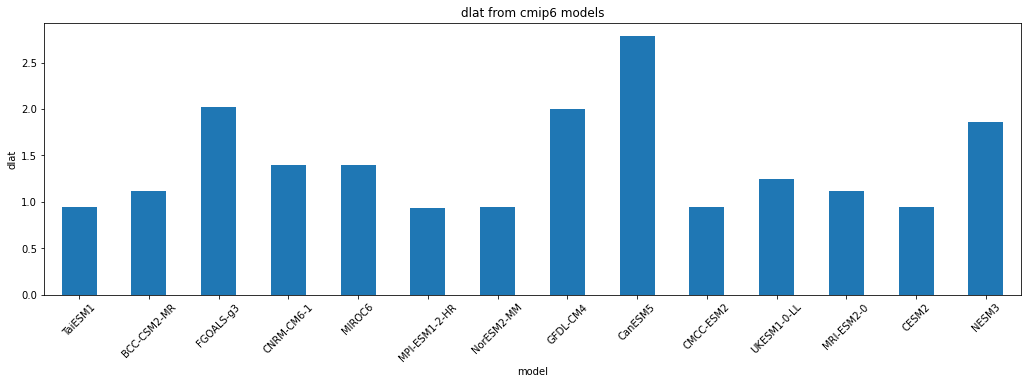

In [105]:
dlats = xr.DataArray(
    data = dlats,
    dims = ['model'],
    coords={'model': model_list},
    )

plt.figure()
dlats.to_series().plot.bar(rot=45)
plt.title('dlat from cmip6 models')
plt.ylabel('dlat')

Text(0, 0.5, 'dlon')

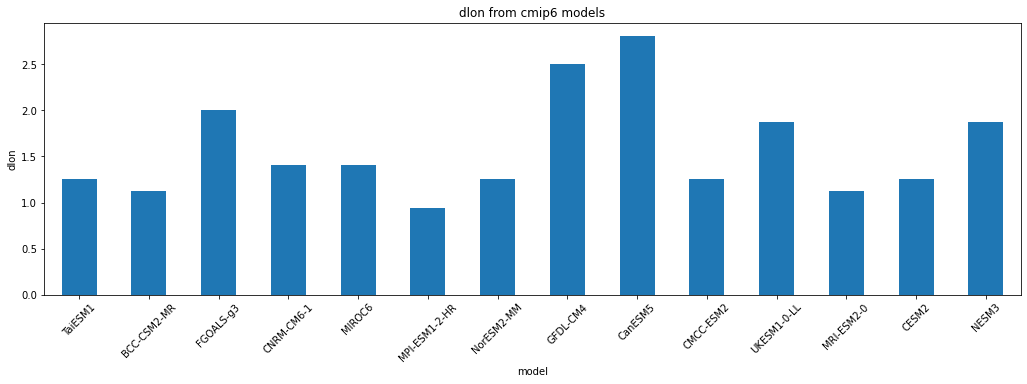

In [108]:
dlons = xr.DataArray(
    data = dlons,
    dims = ['model'],
    coords={'model': model_list},
    )

plt.figure()
dlons.to_series().plot.bar(rot=45)
plt.title('dlon from cmip6 models')
plt.ylabel('dlon')

Text(0, 0.5, 'resolution (dlat x dlon)')

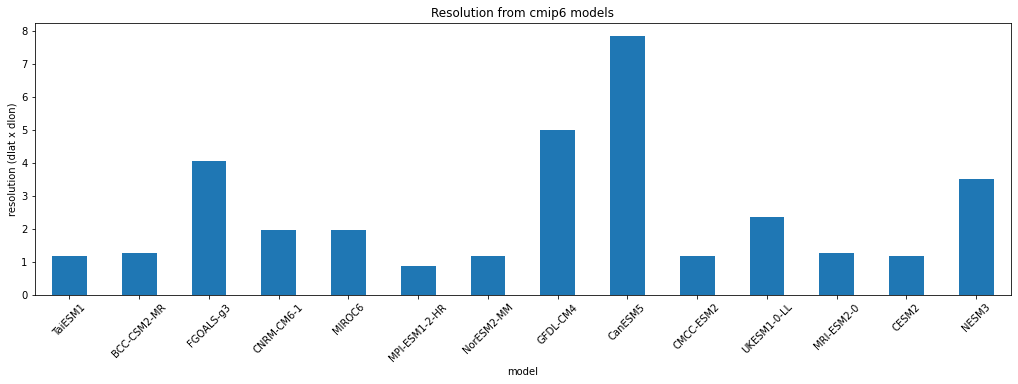

In [110]:
res = xr.DataArray(
    data = res,
    dims = ['model'],
    coords={'model': model_list},
    )

plt.figure()
res.to_series().plot.bar(rot=45)
plt.title('Resolution from cmip6 models')
plt.ylabel('resolution (dlat x dlon)')